<a href="https://colab.research.google.com/github/WermooZ/midi_musical_analysis/blob/main/scales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install music21


In [ ]:
cd  '/content/drive/My Drive/Colab Notebooks/scales'

/content/drive/My Drive/Colab Notebooks/scales


In [ ]:
import music21

score = music21.converter.parse('nowy_kawalek.mid')
key = score.analyze('key')
print(key.tonic.name, key.mode)

key1 = score.analyze('Krumhansl')
print(key1.tonic.name, key1.mode)

key2 = score.analyze('AardenEssen')
print(key2.tonic.name, key2.mode)


C minor
C minor
C minor


In [ ]:
!pip install --upgrade music21

In [ ]:
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore
!apt-get install lilypond

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drive

In [ ]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.


In [ ]:
!sh -e /etc/init.d/x11-common start


 * Setting up X socket directories...
   ...done.


In [ ]:

import os
os.putenv('DISPLAY', ':99.0')

In [ ]:
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset

/usr/bin/Xvfb already running.


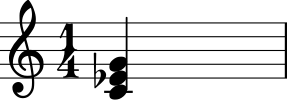

In [ ]:
from music21 import *

us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
#us['directoryScratch'] = '/'

cMinor = chord.Chord(["C4","G4","E-5"])
cClosed = cMinor.closedPosition()
cClosed.show()

In [ ]:
!pip install roman
!pip install pychord

In [ ]:
def to_notes(pitches_list):
    return [p.name for p in pitches_list]

def get_scale(scale_name):
    # returns note in given scale
    data = scale_name.split(sep=" ")

    if data[1] == 'minor' :
        return music21.scale.MinorScale(data[0])
    return  music21.scale.MajorScale(data[0])

def get_pitches_for_scale(scale):
    return scale.getPitches()


def simplify_notes(note_list):
    # returns source note names changed encharmonicalle 
    es = music21.analysis.enharmonics.EnharmonicSimplifier(note_list)
    return list(es.bestPitches())

def get_notes_from_scale(scale):
    return to_notes(simplify_notes(get_pitches_for_scale(scale)))

def get_all_notes_from_score(score):
    notes = []
    for note in score.pitches:
        notes.append(note.name)

    return list(set(notes))


In [ ]:
#  run
scale_name = 'a# major'
score_scale = get_scale(scale_name)
scale_notes = get_notes_from_scale(score_scale)


print(scale_notes)


['B-', 'C', 'D', 'E-', 'F', 'G', 'A', 'B-']


In [ ]:
def get_all_notes_from_score(score):
    notes = []
    for note in score.pitches:
        notes.append(note.name)

    return list(set(notes))

all_notes = to_notes(simplify_notes(get_all_notes_from_score(score)))
print(all_notes)

['G#', 'E', 'B-', 'F', 'C', 'E-', 'C#', 'D', 'F#', 'G', 'A']


In [ ]:
import roman

def get_scale_degree(scale_notes, note_name):
    try:
      return roman.toRoman(scale_notes.index(note_name) + 1)
    except:
      return ''
    

print(scale_notes)
get_scale_degree(scale_notes, 'B-')

['B-', 'C', 'D', 'E-', 'F', 'G', 'A', 'B-']


'I'

In [ ]:
def diff_notes(all_notes, notes):
    # get all notes that are not scale
    s = set(notes)
    return [x for x in all_notes if x not in s]

diff_notes(all_notes, scale_notes)

['G#', 'E', 'C#', 'F#']

In [ ]:
components = []
for element in score.recurse():
    components.append(element)

In [ ]:
print(components)

[<music21.stream.Part 0x7fa4ac44e6d0>, <music21.instrument.Instrument >, <music21.instrument.Instrument >, <music21.tempo.MetronomeMark vivacissimo Quarter=170.0>, <music21.meter.TimeSignature 4/4>, <music21.stream.Voice 0x7fa48e325f90>, <music21.note.Rest rest>, <music21.chord.Chord D4 A3 F3>, <music21.note.Rest rest>, <music21.chord.Chord F4 C4 G#3>, <music21.chord.Chord C4 G3 C3>, <music21.chord.Chord B-3 F3 D3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord D4 A3 F3>, <music21.chord.Chord F4 C4 G#3>, <music21.chord.Chord F4 C4 G#3>, <m

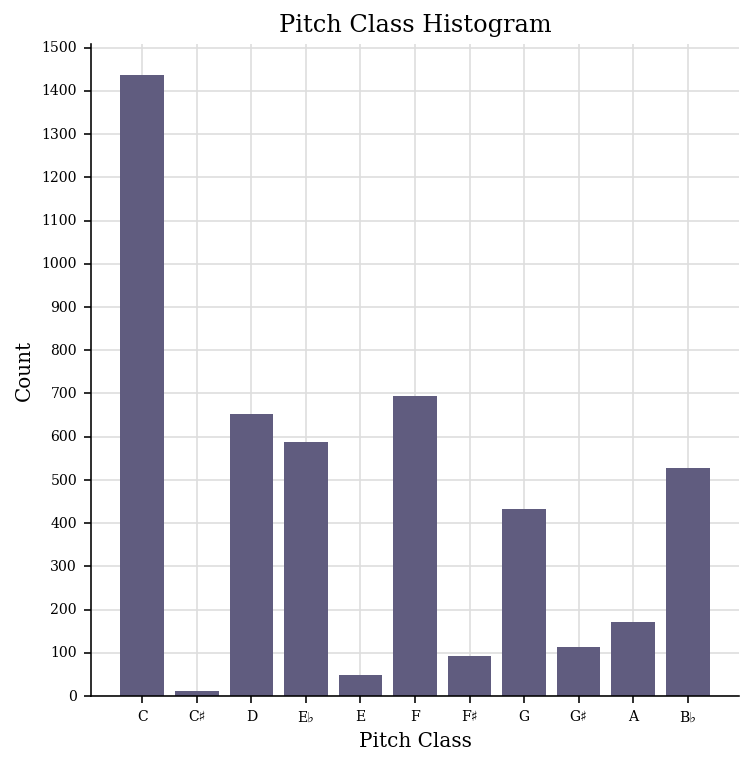

In [ ]:
p = music21.graph.plot.HistogramPitchClass(score)
p.id
p.run()

In [ ]:
nameCount = music21.analysis.pitchAnalysis.pitchAttributeCount(score, 'name')
for n, count in nameCount.most_common(10):
    print("%2s: %2d" % (n, nameCount[n]))

 C: 1437
 F: 694
 D: 653
E-: 587
B-: 528
 G: 433
 A: 171
G#: 114
F#: 93
 E: 48


In [ ]:
s = analysis.reduceChords.testMeasureStream1().notes
cr = analysis.reduceChords.ChordReducer()
cws = cr.computeMeasureChordWeights(s)
for pcs in sorted(cws):
    print("%18r  %2.1f" % (pcs, cws[pcs]))

         (0, 4, 7)  3.0
     (0, 11, 4, 5)  1.0


In [ ]:
from music21 import *


In [ ]:
score.elements[0].notesAndRests

<music21.stream.iterator.StreamIterator for Part:0x7fa4ac44e6d0 @:0>

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

Hello World !


In [ ]:
def get_chord(beat):
  pitches = beat.pitches
  bass = beat.bass().nameWithOctave

  pitchNames =[]
  for pitch in pitches:
      if pitch.nameWithOctave == bass:
        pitchNames.append(color.BOLD + pitch.nameWithOctave + color.END)
      else:
        pitchNames.append(pitch.nameWithOctave)
    
  return ' '.join(pitchNames)


def get_bass_note(beat):
  pitches = beat.pitches
  return beat.bass().name


 


In [ ]:
score

<music21.stream.Score 0x7fa4ac443810>

In [ ]:
sc = score.chordify()
sc.__dict__

print("name, order, cosonant, root")


def semitones_diff(tones):
  if len(tones) != 2:
      return 0
  return tones[0] - tones[1]

sc1 = music21.scale.MinorScale('c')
pitches = sc1.getPitches('c0', 'c6')
#scale_notes = [str(p.name) for p in pitches]
#scale_notes


def is_alien(scale_notes, note):
    if note.name not in scale_notes:
      return 'A'
    return '_'

name, order, cosonant, root


In [ ]:
from collections import OrderedDict

# c - major, cmi - minor, c+ - aug, c0- dimi
QUALITY_DICT = OrderedDict((
    # chords consist of 2 notes
    ('4',        {0, 5}),
    ('5',        {0, 7}),
    ('sus',      {0, 7}),
    ('7',        {0, 10}),
    ('8',        {0, 12}),
    # chords consist of 2 notes add 12
    ('4(8)',     {0, 5, 12}),
    ('5(8)',     {0, 7, 12}),
    ('sus(8)',   {0, 7, 12}),
    # 3 notes
    ('',         {0, 4, 7}),
    ('mi',       {0, 3, 7}),
    ('o',        {0, 3, 6}),
    ('+',        {0, 4, 8}),
    ('sus2',     {0, 2, 7}),
    ('sus4',     {0, 5, 7}),
    # 3 notes + oct
    ('(8)',      {0, 4, 7, 12}),
    ('m(8)',     {0, 3, 7, 12}),
    ('mi(8)',    {0, 3, 7, 12}),
    ('o(8)',     {0, 3, 6, 12}),
    ('aug(8)',   {0, 4, 8, 12}),
    ('sus2(8)',  {0, 2, 7, 12}),
    ('sus4(8)',  {0, 5, 7, 12}),
    # 4 note
    ('6',        {0, 4, 7, 9}),
    ('7',        {0, 4, 7, 10}),
    ('7(b5)',    {0, 4, 6, 10}),
    ('7(#5)',    {0, 4, 8, 10}),
    ('7sus4',    {0, 5, 7, 10}),
    ('mi6',      {0, 3, 7, 9}),
    ('mi7',      {0, 3, 7, 10}),
    ('mi7(b5)',  {0, 3, 6, 10}),
    ('06',       {0, 3, 6, 9}),
    ('M7',       {0, 4, 7, 11}),
    ('7',        {0, 4, 7, 11}),
    ('M7(#5)',   {0, 4, 8, 11}),
    ('mM7',      {0, 3, 7, 11}),
    ('(9)',      {0, 4, 7, 14}),
    ('m(9)',     {0, 3, 7, 14}),
    ('2',        {0, 4, 7, 14}),
    ('(11)',     {0, 4, 7, 17}),
    ('4',        {0, 4, 7, 17}),
    # 5 notes
    ('m69',      {0, 3, 7, 9, 14}),
    ('69',       {0, 4, 7, 9, 14}),
    ('9',        {0, 4, 7, 10, 14}),
    ('m9',       {0, 3, 7, 10, 14}),
    ('M9',       {0, 4, 7, 11, 14}),
    ('maj9',     {0, 4, 7, 11, 14}),
    ('9sus4',    {0, 5, 7, 10, 14}),
    ('7(b9)',    {0, 4, 7, 10, 13}),
    ('7(#9)',    {0, 4, 7, 10, 15}),
    ('9(b5)',    {0, 4, 6, 10, 14}),
    ('9(#5)',    {0, 4, 8, 10, 14}),
    ('7(#9b5)',  {0, 4, 6, 10, 15}),
    ('7(#9#5)',  {0, 4, 8, 10, 15}),
    ('m7(b9b5)', {0, 3, 6, 10, 13}),
    ('7(b9b5)',  {0, 4, 6, 10, 13}),
    ('7(b9#5)',  {0, 4, 8, 10, 13}),
    ('11',       {0, 7, 10, 14, 17}),
    ('7(#11)',   {0, 4, 7, 10, 18}),
    ('7(b9#9)',  {0, 4, 7, 10, 13, 15}),
    ('7(b9#11)', {0, 4, 7, 10, 13, 18}),
    ('7(#9#11)', {0, 4, 7, 10, 15, 18}),
    ('7(b13)',   {0, 4, 7, 10, 20}),
    # 6 notes
    ('7(b9b13)', {0, 4, 7, 10, 13, 17, 20}),
    ('9(#11)',   {0, 4, 7, 10, 14, 18}),
    ('13',       {0, 4, 7, 10, 14, 21}),
    ('13(b9)',   {0, 4, 7, 10, 13, 21}),
    ('13(#9)',   {0, 4, 7, 10, 15, 21}),
    ('13(#11)',  {0, 4, 7, 10, 18, 21}),
))

In [ ]:
from collections import Counter

#res = Counter(test_dict.values())

def get_chord_name_from_notes(notes_list):
  return note_to_chord(notes_list)


#print(get_chord_name_from_notes(["C", "E", "G"]))

def get_chord_name_for_intervals(root_note_name, intervals):
  if len(intervals) < 2:
      return root_note_name

  interval_set = set(intervals)
  for key, value in QUALITY_DICT.items():
    if value == interval_set:
      return root_note_name + key
    elif len(value.intersection(interval_set)) > 2: #get incomplete chords
      return 'INCOMPLETE: ' + root_note_name + key

  return 




get_chord_name_for_intervals('C', [0, 3, 7])

def reduce_intervals(intervals):
  intervals.pop(0)
  first_value = intervals[0]
  intervals[:] = [interval - first_value for interval in intervals]
  return intervals

def remove_low_voicing(pitches):
  pitches[0].transpose(interval.GenericInterval(12))
  return pitches



In [ ]:
def get_ordered_pitch_list(chord):
    pitches = list(x.pitches)
    pitches.sort()

    return pitches

def get_intervals(pitches):
  intervals = []
  root = pitches[0]
  for pitch in pitches:
    interval = music21.interval.Interval(noteStart=root, noteEnd=pitch)

    intervals.append(interval.semitones)

  return intervals

In [ ]:

import re

max_beat = 2

print(sc);
stream1 = stream.Stream()
beat_no = 4
for x in sc:
  if not isinstance(x, music21.chord.Chord):
    print (color.BLUE + '{beat_no} -------------- '.format(beat_no=beat_no) + color.END) 
  else:
    bass_note = get_bass_note(x)

    name = x.commonName
    cosonant = x.isConsonant()  and "Cos" or "Dis"
    inversion = x.inversion()
    if x.canBeTonic():
      cosonant = color.GREEN + cosonant + color.END
    elif x.canBeDominantV():
      cosonant = color.RED + cosonant + color.END

    try:
      chord_name = get_chord_name(x)
    except:
      chord_name = '_' 

    chord = get_chord(x)

    chord_pitches = get_ordered_pitch_list(chord)
    intervals = get_intervals(chord_pitches)

    #chord_name = find_chord_name_by_pitches(pitches)
    chord_name = ""

    note_name = re.sub("\d+", "", x.root().name)
    degree = get_scale_degree(scale_notes, note_name)
    #print(note_name)
    #harm = get_note_function(major_notes, note_name)
    harm = ""

    beatStrength = x.beatStrength #siła akcentu
    beatStr = x.beatStr
    tie = ' '
    if x.tie:
      if x.tie.type == 'start':
        tie = '+'
      else:
        tie = '|'

    if beatStr == '1':
      beat_no = beat_no + 1
      #stream1.show()
      stream1 = stream.Stream()

      print (color.BLUE + '{beat_no} -------------- '.format(beat_no=beat_no) + color.END)




    print(
        "[{b:8} {bst:10}] {tie} {chord:32} {inversion} {cosonant}; {intervals} {chord_name} {degree} {harm}"
        .format(b=beatStr, tie=tie, bst=beatStrength, n=name,chord=chord, intervals=intervals, cosonant=cosonant, inversion=inversion, chord_name=chord_name, degree=degree, harm=harm)
        )
    stream1.append(x) 
    #break

<music21.stream.Part 0x7fa48da88990>
4 -------------- 
4 -------------- 
4 -------------- 
4 -------------- 
4 -------------- 
5 -------------- 
[1               1.0] + F3 A3 D4                 1 Cos; [0, 4, 9]    
[1 1/4        0.0625] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[1 1/2         0.125] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[1 3/4        0.0625] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[2              0.25] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[2 1/4        0.0625] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[2 1/2         0.125] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[2 3/4        0.0625] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[3               0.5] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[3 1/4        0.0625] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[3 1/2         0.125] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[3 3/4        0.0625] | F3 A3 D4                 1 Cos; [0, 4, 9]    
[4             

In [ ]:
#harmonia funkcyjna
major_scale = get_scale('c major')
major_notes = get_notes_from_scale(major_scale)

def get_note_function(major_notes, note_name):
  scale_fun = {1:'T', 2:'s2', 3:'s2', 4:'S', 5:'D', 6:'t2', 7:'d2'}
  scale_notes.index(note_name) + 1

  return scale_fun[scale_notes.index(note_name) + 1]

get_note_function(major_notes, 'D')


In [ ]:
#%% [code]
note1 = pitch.Pitch('G4')
note2 = pitch.Pitch('C4')
note3 = pitch.Pitch('F4')

import re

def get_plain_note_name_from_pitch(pitch):
  return re.sub("\d+", "", pitch.name)

def find_chord_name_by_pitches(pitches):
  root_name = get_plain_note_name_from_pitch(pitches[0])

  if len(pitches) < 2:
    return root_note_name

  interval_set = set(get_intervals(pitches))

  #full match for chord
  for key, value in QUALITY_DICT.items():
    if value == interval_set:
      return root_name + key

  #similarity
  values = {}
  for key, value in QUALITY_DICT.items():
    values[similarity(interval_set, value)] = key

  return '~' + values[max(values)] + key


pitches2 = [note1, note2, note3]
pitches2.sort()
print(find_chord_name_by_pitches(pitches2))
print(get_intervals(pitches2))



In [ ]:
def get_chord(beat):
  pitches = beat.pitches
  bass = beat.bass().nameWithOctave

  pitchNames =[]
  for pitch in pitches:
      if pitch.nameWithOctave == bass:
        pitchNames.append(color.BOLD + pitch.nameWithOctave + color.END)
      else:
        pitchNames.append(pitch.nameWithOctave)
    
  return ' '.join(pitchNames)

def get_midi_notes2(beat):
  list = [x.midi for x in beat.pitches]
  print(list)

def get_midi_notes(beat):
  for x in beat.pitches:
    print(x.midi)

for beat in sc:
  if  isinstance(beat, music21.chord.Chord):

    get_midi_notes(chord)
    #get_midi_notes2(chord)

In [ ]:
import math
def cosine_similarity(v1,v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

v1,v2 = [3, 45, 7, 2], [2, 54, 13, 15]

def similarity(chord, pattern):
  return len(chord.intersection(pattern)) / len(pattern) 


In [ ]:
note1 = pitch.Pitch('G4')
note2 = pitch.Pitch('C4')
note3 = pitch.Pitch('F4')

import re

def get_plain_note_name_from_pitch(pitch):
  return re.sub("\d+", "", pitch.name)

def find_chord_name_by_pitches(pitches):
  root_name = get_plain_note_name_from_pitch(pitches[0])

  if len(pitches) < 2:
    return root_note_name

  interval_set = set(get_intervals(pitches))

  #full match for chord
  for key, value in QUALITY_DICT.items():
    if value == interval_set:
      return root_name + key

  #similarity
  values = {}
  for key, value in QUALITY_DICT.items():
    values[similarity(interval_set, value)] = key

  return '~' + values[max(values)] + key


pitches2 = [note1, note2, note3]
pitches2.sort()
print(find_chord_name_by_pitches(pitches2))
print(get_intervals(pitches2))


In [ ]:
#251 detect
print(scale_notes)
get_scale_degree(scale_notes, 'B-')




In [ ]:
h1 = music21.harmony.ChordSymbol('E')
[str(p) for p in h1.pitches]


In [ ]:
x.__dict__


c     | C, G     | E, A, H        | D                        | Des, Es, F, Ges, As, B

In [ ]:
h1 = music21.harmony.ChordSymbol('A')
[str(p) for p in h1.pitches]

In [ ]:
pip install mingus

In [ ]:
import mingus.core.chords as chords
import re

notes = ['C#1']

def get_chord_name(notes):
  notes = [re.sub(r'[0-9]+', '', sub) for sub in notes]
  notes = list(set(notes))
  return chords.determine(notes, True)

print(get_chord_name(notes))

In [ ]:
!pip install git+https://github.com/ruiguo-bio/midi-miner.git

In [ ]:
c = music21.converter.parseFile('enuma_elish.musicxml')


In [ ]:
sChords = c.chordify()
sChords
c.show()

In [ ]:
key = c.analyze('key')
print(key.tonic.name, key.mode)

key1 = c.analyze('Krumhansl')
print(key1.tonic.name, key1.mode)

key2 = c.analyze('AardenEssen')
print(key2.tonic.name, key2.mode)

In [ ]:
p = music21.graph.plot.HorizontalBarPitchSpaceOffset(c)
p.run()  # with d